In [5]:
import requests
from skimage.io import imread
from PIL import Image

In [9]:
# send image to server
url = 'http://127.0.0.1:5000/upload'
file = {'image': open('/home/pico/code/BSR-33/computer_vision_pytorch/name.jpg', 'rb')}
response = requests.post(url, files=file)
print(response.text)

Image received


In [8]:
#get image from server
im = Image.fromarray(imread('http://127.0.0.1:5000/download'))
type(im)

PIL.Image.Image

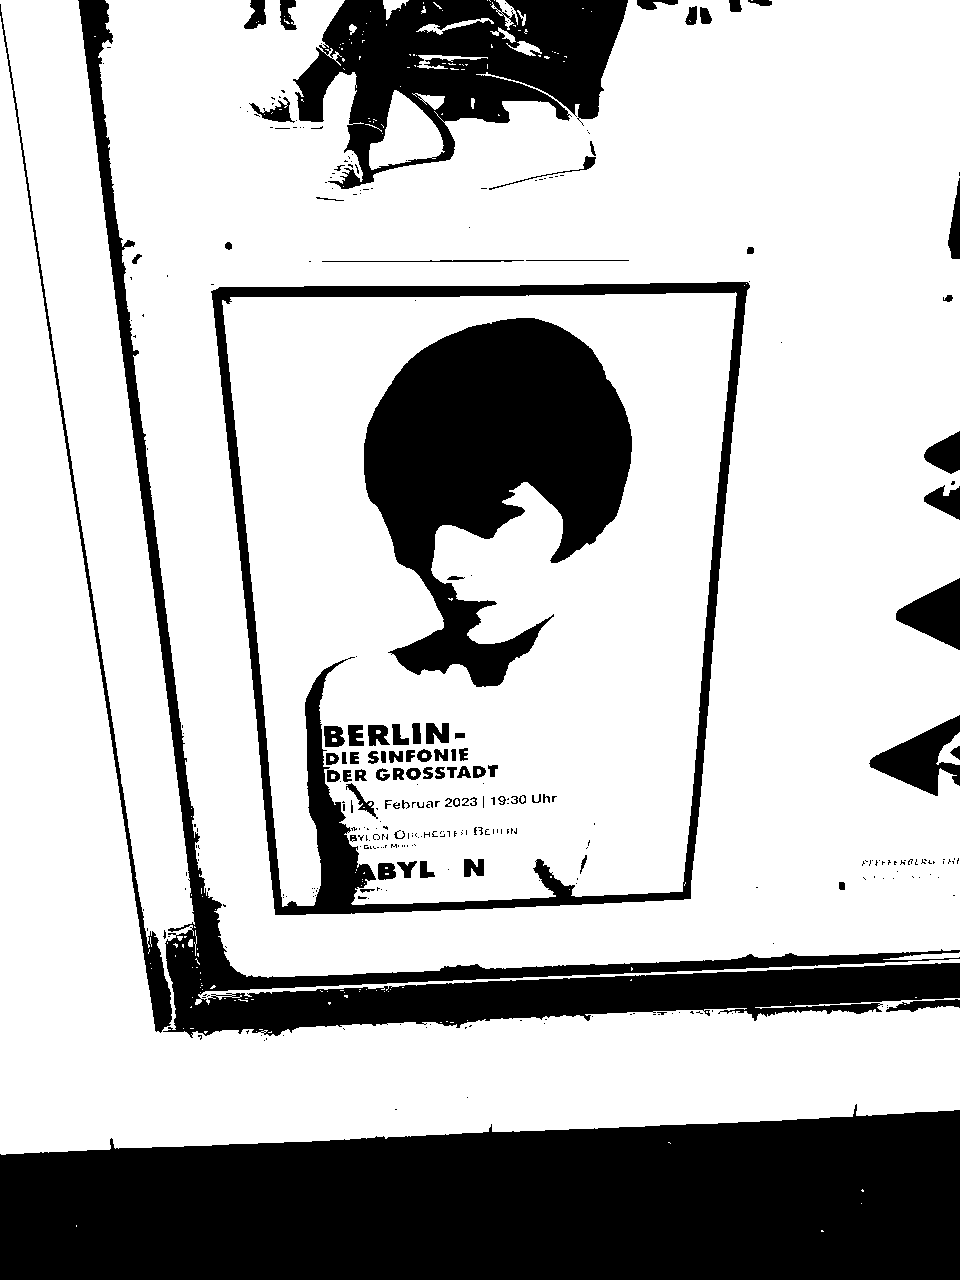

In [11]:
import requests
import cv2
import numpy as np
from PIL import Image
import io

url = 'http://127.0.0.1:5000/process_image'

# read the image file
image = cv2.imread('test_image.jpg')

# convert the image to bytes
_, img_encoded = cv2.imencode('.jpg', image)
image_bytes = img_encoded.tobytes()

# send the image to the server
response = requests.post(url, files={'image': image_bytes})

# convert the response to a PIL image
pil_image = Image.open(io.BytesIO(response.content))

# display the black and white image
pil_image#.show()


In [ ]:
#for checking the timeout of a request
import requests

try:
    response = requests.get('http://example.com', timeout=5)
    print(response.text)
except requests.exceptions.Timeout:
    print('The request timed out')